# another idea for plotting posterior predictive

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%config InlineBackend.figure_format = 'retina'

In [2]:
delays = np.linspace(0,365,200)
RB = 100
RA_vals = np.linspace(100,0,150)

In [3]:
P = np.zeros((len(RA_vals), len(delays)))

In [4]:
Phi = lambda x: norm.cdf(x, loc=0, scale=1)

In [5]:
k = np.exp(-5)
α = 2
ϵ = 0.01

DA = 0
for row, RA in enumerate(RA_vals):
    for col, delay in enumerate(delays):
        
        VA = RA
        VB = RB * 1 / (1+k*delay)
        
        P[row, col] = ϵ+(1-2*ϵ) * Phi((VB-VA)/α)

Text(0, 0.5, '$R^A/R^B$')

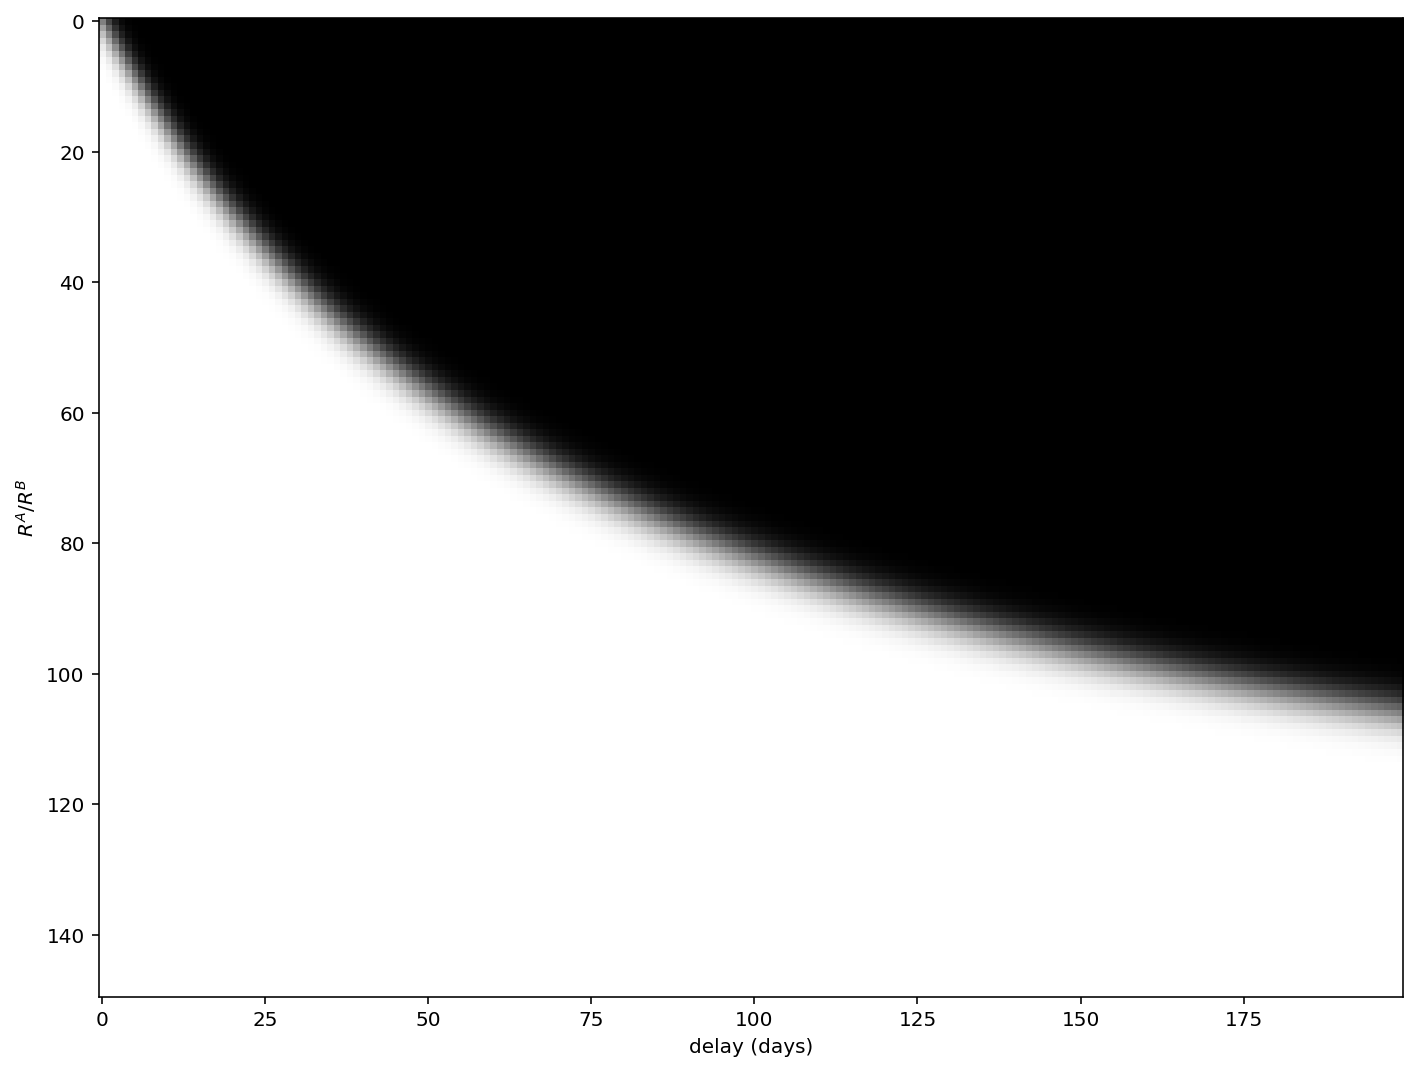

In [6]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.imshow(P, origin='upper', cmap=cm.gray)
ax.set_xlabel('delay (days)')
ax.set_ylabel('$R^A/R^B$')


# Visualise an attribute-wise model

In [7]:
# Point Python to the path where we have installed the bad and darc packages
import sys
sys.path.insert(0, '/Users/btvincent/git-local/darc-experiments-python')

In [8]:
import darc
from darc.delayed import models
from darc.designs import BADDesignGenerator
from darc.data_plotting import plot_delay_without_front_end_delays
from darc_parameter_recovery import simulated_experiment_trial_loop

In [9]:
design_thing = BADDesignGenerator(max_trials=20, 
                          RA=list(np.arange(5, 99+1, 1)), 
                          DB=list(np.arange(1, 365, 7)))

In [10]:
model = models.ProportionalDifference(n_particles=5000)
model.θ_true = pd.DataFrame.from_dict({'δ': [0], 'α': [2]})

In [11]:
fitted_model = simulated_experiment_trial_loop(design_thing, model)

KeyError: 'logk'

In [ ]:
θ = fitted_model.get_θ_point_estimate()
θ

In [ ]:
θ = fitted_model.get_θ_point_estimate()
DA = 0
RB = 100

delays = np.linspace(1,365,200)
RA_vals = np.linspace(100,0,150)
P = np.zeros((len(RA_vals), len(delays)))

for row, RA in enumerate(RA_vals):
    for col, delay in enumerate(delays):
        
        data = pd.DataFrame.from_dict({'RA': [RA], 'DA': [0],
                                       'RB': [RB], 'DB': [delay]})
        
        x = fitted_model.calc_decision_variable(θ, data)
        
        P[row, col] = ϵ+(1-2*ϵ) * Phi(x/α)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.imshow(P, origin='upper', cmap=cm.gray)
ax.set_xlabel('delay (days)')
ax.set_ylabel('$R^A/R^B$')

In [ ]:
RA = np.array([2, 1.6]) 
PA = np.array([0.1, 0.9]) 

In [ ]:
sum(RA * PA)

In [ ]:
rewards = np.array([RA, RA, RA])
probs = np.array([PA, PA, PA])

In [ ]:
rewards

In [ ]:
for reward, prob in zip(rewards, probs):
    print(reward, prob)
    print(f'V = {sum(reward*prob)}')

In [ ]:
# can do it nicer without a loop like this
V = np.sum(rewards * probs, axis=1)
V

In [ ]:
def u(reward):
    '''utility function'''
    return reward

def π(prob):
    '''probability weighting function'''
    return prob

def V(rewards, probs):
    '''Calculate subjective value'''
    return np.sum(u(rewards) * π(probs), axis=1)

In [ ]:
# example with normal single outcome
rewards = np.array([[2],
                    [-4], 
                    [3]])
probs = np.array([[0.5],
                  [0.1],
                  [0.4]])

print(V(rewards, probs))

In [ ]:
# example with multiple outcomes
rewards = np.array([[-10, 20],
                    [-50, 40],
                    [-1, 2]])
probs = np.array([[0.5, 0.5],
                  [0.5, 0.5],
                  [0.5, 0.5]])

print(V(rewards, probs))